<a href="https://colab.research.google.com/github/anushree124/PRODIGY_TrackCode_TaskNumber/blob/main/Pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install numpy
# !pip install tensorflow
# !pip install opencv-python
# !pip install pandas
# !pip install glob2
# !pip install matplotlib

In [ ]:
# !pip install random2
# !pip install pathlib
# !pip install os-sys
# !pip install keras

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import random
from random import randint
from pathlib import Path
import os
# print(os.listdir("../input"))

In [ ]:
import os # Import the os module to use its functions

print(os.listdir("/content/drive/MyDrive/chest_xray"))


['train', 'val', 'test', '.DS_Store', 'cnn_model.h5']


In [ ]:
print(os.listdir("/content/drive/MyDrive/chest_xray"))

['train', 'val', 'test', '.DS_Store', 'cnn_model.h5']


In [ ]:
train_dir = '/content/drive/MyDrive/chest_xray/train'
test_dir =  '/content/drive/MyDrive/chest_xray/test'
X = []
Y = []

#Loop through the training and test folders, as well as the 'NORMAL' and 'PNEUMONIA' subfolders and append all images into array X.  Append the classification (0 or 1) into array Y.

for fileName in os.listdir(train_dir + "/NORMAL"):
        img = cv2.imread(train_dir + "/NORMAL/" + fileName)
        if img is not None:
            Y.append(0)
            img = cv2.resize(img,(64,64))
            X.append(img)

for fileName in os.listdir(train_dir + "/PNEUMONIA"):
        img = cv2.imread(train_dir + "/PNEUMONIA/" + fileName)
        if img is not None:
            Y.append(1)
            img = cv2.resize(img,(64,64))
            X.append(img)

for fileName in os.listdir(test_dir + "/NORMAL"):
        img = cv2.imread(test_dir + "/NORMAL/" + fileName)
        if img is not None:
            Y.append(0)
            img = cv2.resize(img,(64,64))
            X.append(img)

for fileName in os.listdir(test_dir + "/PNEUMONIA"):
        img = cv2.imread(test_dir + "/PNEUMONIA/" + fileName)
        if img is not None:
            Y.append(1)
            img = cv2.resize(img,(64,64))
            X.append(img)

This is an example of a patient X-ray who does not have pneumonia:


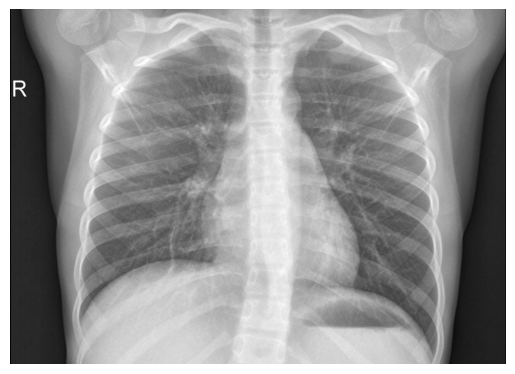

In [ ]:
print("This is an example of a patient X-ray who does not have pneumonia:")
normal = cv2.imread(test_dir + "/NORMAL/IM-0003-0001.jpeg")
plt.axis('off')
plt.imshow(normal)

This is an example of an X-ray of a patient diagnosed with pneumonia:


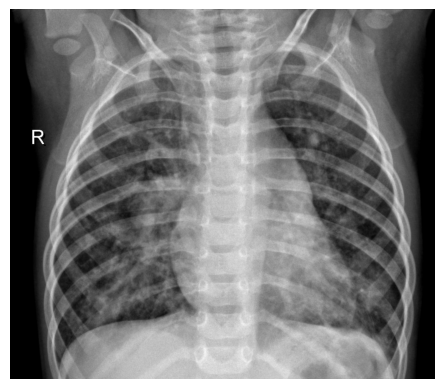

In [ ]:
print("This is an example of an X-ray of a patient diagnosed with pneumonia:")
pnumonia = cv2.imread(test_dir + "/PNEUMONIA/person15_virus_46.jpeg")
plt.axis('off')
plt.imshow(pnumonia)

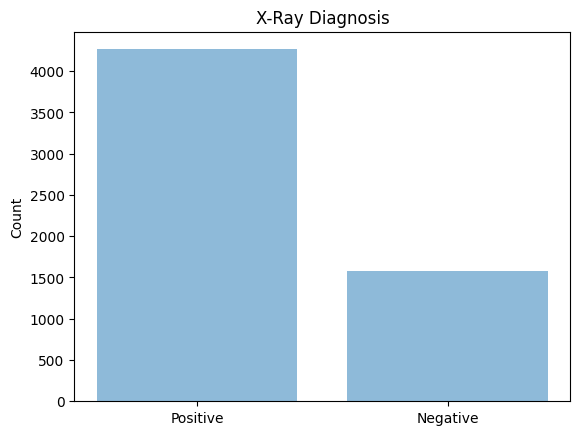

There are 4265 pneumonia positive X-ray's in our data
There are 1575 pneumonia negative X-ray's in our data


In [ ]:
#Data visualization

pos = 0
neg = 0

for i in range(len(Y)):  # Start iterating from 0
    if Y[i] == 1:       # Directly check the value in Y
        pos = pos + 1
    else:
        neg = neg + 1



objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
performance = [pos,neg]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('X-Ray Diagnosis')

plt.show()

print("There are " +str(pos) +" pneumonia positive X-ray's in our data")
print("There are " +str(neg) +" pneumonia negative X-ray's in our data")

['train', 'val', 'test', '.DS_Store', 'cnn_model.h5']
Epoch 1/20
62/62 [==============================] - 36s 552ms/step - loss: 0.3520 - accuracy: 0.9021 - val_loss: 0.3112 - val_accuracy: 0.8548
Epoch 2/20
62/62 [==============================] - 31s 499ms/step - loss: 0.1869 - accuracy: 0.9438 - val_loss: 0.2986 - val_accuracy: 0.8849
Epoch 3/20
62/62 [==============================] - 34s 547ms/step - loss: 0.1532 - accuracy: 0.9440 - val_loss: 0.2362 - val_accuracy: 0.9191
Epoch 4/20
62/62 [==============================] - 31s 502ms/step - loss: 0.1347 - accuracy: 0.9563 - val_loss: 0.2138 - val_accuracy: 0.9331
Epoch 5/20
62/62 [==============================] - 33s 538ms/step - loss: 0.1115 - accuracy: 0.9594 - val_loss: 0.2026 - val_accuracy: 0.9341
Epoch 6/20
62/62 [==============================] - 31s 501ms/step - loss: 0.0967 - accuracy: 0.9645 - val_loss: 0.2050 - val_accuracy: 0.9440
Epoch 7/20
62/62 [==============================] - 32s 517ms/step - loss: 0.0956 - accu

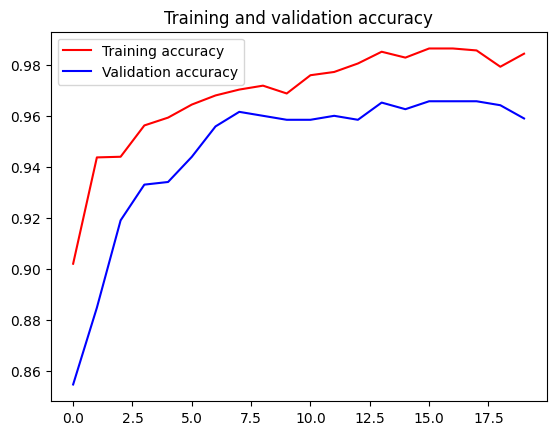

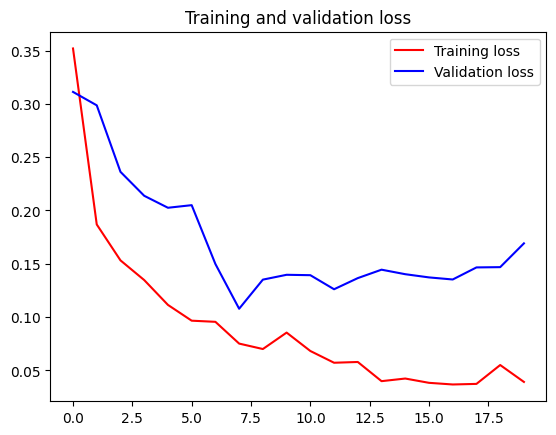

61/61 [==============================] - 3s 50ms/step - loss: 0.1692 - accuracy: 0.9590
Test accuracy: 95.90%


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import random
from random import randint
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Loading data
print(os.listdir("/content/drive/MyDrive/chest_xray"))
train_dir = '/content/drive/MyDrive/chest_xray/train'
test_dir =  '/content/drive/MyDrive/chest_xray/test'
X = []
Y = []

def load_images_from_folder(folder, label):
    for fileName in os.listdir(folder):
        img = cv2.imread(folder + "/" + fileName)
        if img is not None:
            Y.append(label)
            img = cv2.resize(img, (64, 64))
            X.append(img)

load_images_from_folder(train_dir + "/NORMAL", 0)
load_images_from_folder(train_dir + "/PNEUMONIA", 1)
load_images_from_folder(test_dir + "/NORMAL", 0)
load_images_from_folder(test_dir + "/PNEUMONIA", 1)

# Data normalization
X = np.array(X) / 255.0
X = (X - np.average(X, 0)) / np.std(X, 0)
Y = to_categorical(Y, num_classes=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Model definition using TensorFlow 2.x
def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()

history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))

# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Save the Trained Model

In [ ]:
model.save('/content/drive/MyDrive/chest_xray/cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Load the Saved Model

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/chest_xray/cnn_model.h5')


Preprocess the Uploaded Image

In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = (img - np.average(img)) / np.std(img)
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the input shape
    return img


 Create a Function for Prediction

In [ ]:
def predict_pneumonia(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    if np.argmax(prediction, axis=1)[0] == 1:
        return "yes"
    else:
        return "no"


Full Code for Uploading an Image and Making a Prediction

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/chest_xray/cnn_model.h5')

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = (img - np.average(img)) / np.std(img)
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the input shape
    return img

def predict_pneumonia(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    if np.argmax(prediction, axis=1)[0] == 1:
        return "yes"
    else:
        return "no"

# Example usage:
image_path = ''  # Replace with the path to your image
result = predict_pneumonia(image_path, model)
print(f"Does the X-ray show pneumonia? {result}")


1/1 [==============================] - 0s 230ms/step
Does the X-ray show pneumonia? yes
